In [70]:
# Import necessary packages
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

In [61]:
# Import data
file_path = 'train.csv'
df = pd.read_csv(file_path)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [30]:
# Select relevant columns and create a new feature for total bathrooms
df['TotalBath'] = df['FullBath'] + (df['HalfBath'] * 0.5)
X = df[['GrLivArea', 'TotalBath', 'BedroomAbvGr']]
y = df['SalePrice']

In [29]:
# Split the data into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test, = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [47]:
# predicted_prices = model.predict(y_test)
# predicted_prices

In [89]:
# Make predictions on the test data
y_pred = model.predict(X_train)

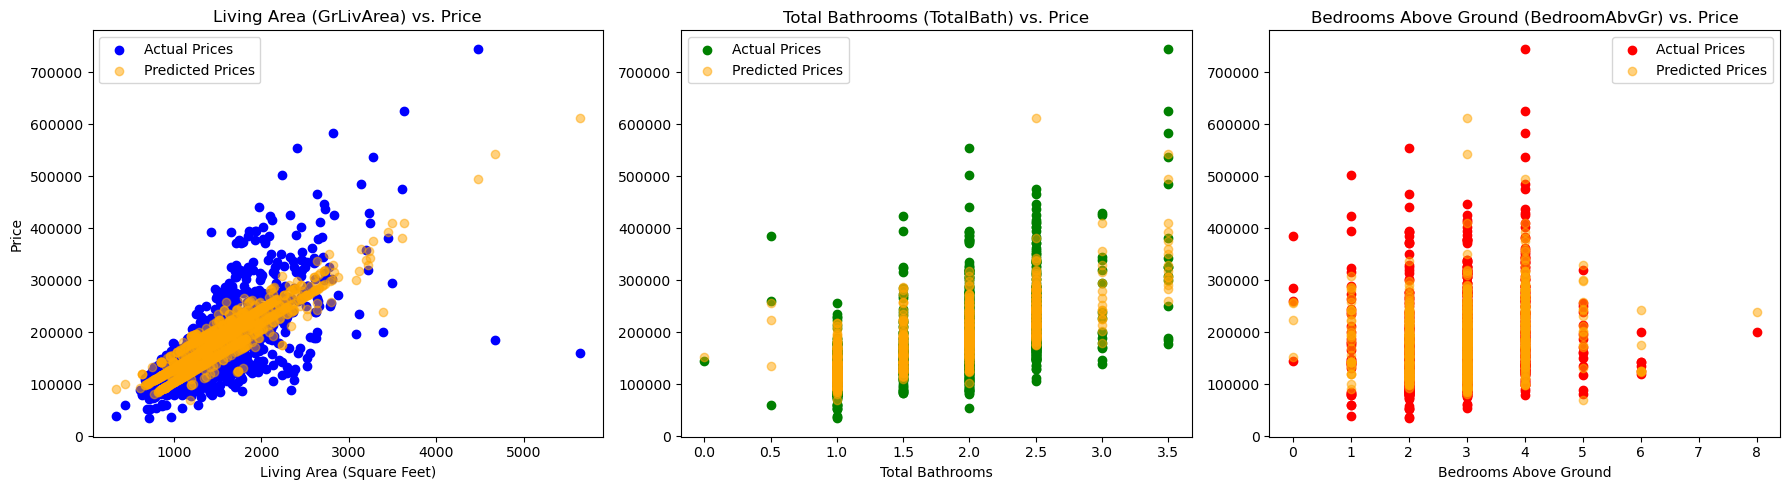

In [93]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Living Area (GrLivArea) vs. Price with Prediction Line
axes[0].scatter(X_train['GrLivArea'], y_train, color="blue", label="Actual Prices")
axes[0].scatter(X_train['GrLivArea'], y_pred, color="orange", label="Predicted Prices", alpha=0.5)
axes[0].set_title("Living Area (GrLivArea) vs. Price")
axes[0].set_xlabel("Living Area (Square Feet)")
axes[0].set_ylabel("Price")
axes[0].legend()

# Total Bathrooms (TotalBath) vs. Price with Prediction Line
axes[1].scatter(X_train['TotalBath'], y_train, color="green", label="Actual Prices")
axes[1].scatter(X_train['TotalBath'], y_pred, color="orange", label="Predicted Prices", alpha=0.5)
axes[1].set_title("Total Bathrooms (TotalBath) vs. Price")
axes[1].set_xlabel("Total Bathrooms")
axes[1].legend()

# Bedrooms Above Ground (BedroomAbvGr) vs. Price with Prediction Line
axes[2].scatter(X_train['BedroomAbvGr'], y_train, color="red", label="Actual Prices")
axes[2].scatter(X_train['BedroomAbvGr'], y_pred, color="orange", label="Predicted Prices", alpha=0.5)
axes[2].set_title("Bedrooms Above Ground (BedroomAbvGr) vs. Price")
axes[2].set_xlabel("Bedrooms Above Ground")
axes[2].legend()

plt.tight_layout()
plt.show()

In [49]:
# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2

(2848523443.419101, 0.6286307301050608)

In [79]:
# Import the test data
test_data = pd.read_csv('test.csv')
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [65]:
# Prepare test data
test_data['TotalBath'] = df['FullBath'] + (df['HalfBath'] * 0.5)
X_test = test_data[['GrLivArea', 'TotalBath', 'BedroomAbvGr']]


In [66]:
# Predict with data
predicted_prices = model.predict(X_test)

In [72]:
# Ouput the predicted prices
output = pd.DataFrame({'Predicted Price':predicted_prices})

In [73]:
print(output)

      Predicted Price
0       161450.189909
1       164838.829179
2       208571.501610
3       165430.767660
4       200094.757685
...               ...
1454    140987.885005
1455    154529.488862
1456    127626.422662
1457    128710.183785
1458    205282.978179

[1459 rows x 1 columns]


In [78]:
# Save as csv file
output.to_csv('Predicted prices.csv', index=False)